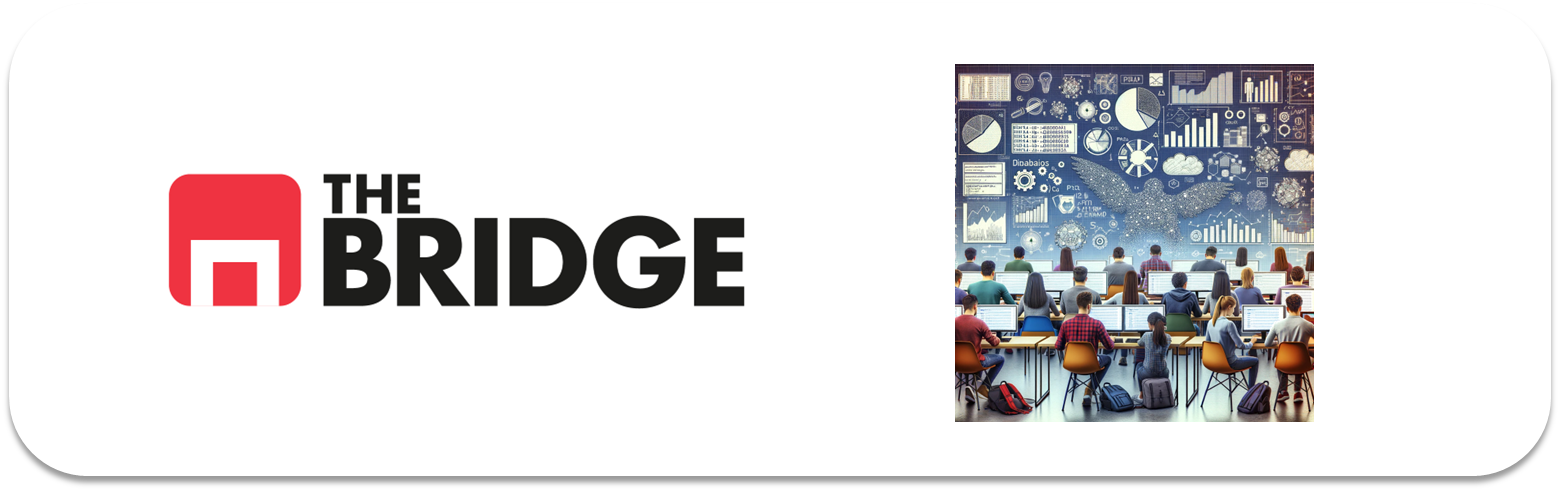

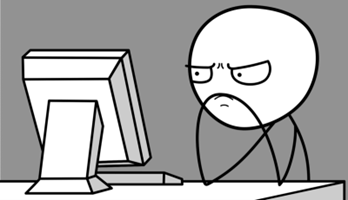

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [32]:
import numpy as np
import pandas as pd

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [9]:
df_car = pd.read_csv('./data/CarPrice_Assignment.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [12]:
df_car.drop(columns='car_ID', inplace=True)
df_car.rename(columns={'price':'target'}, inplace=True)

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_car.drop(columns='target'), df_car.target, test_size=0.2, random_state=42)

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

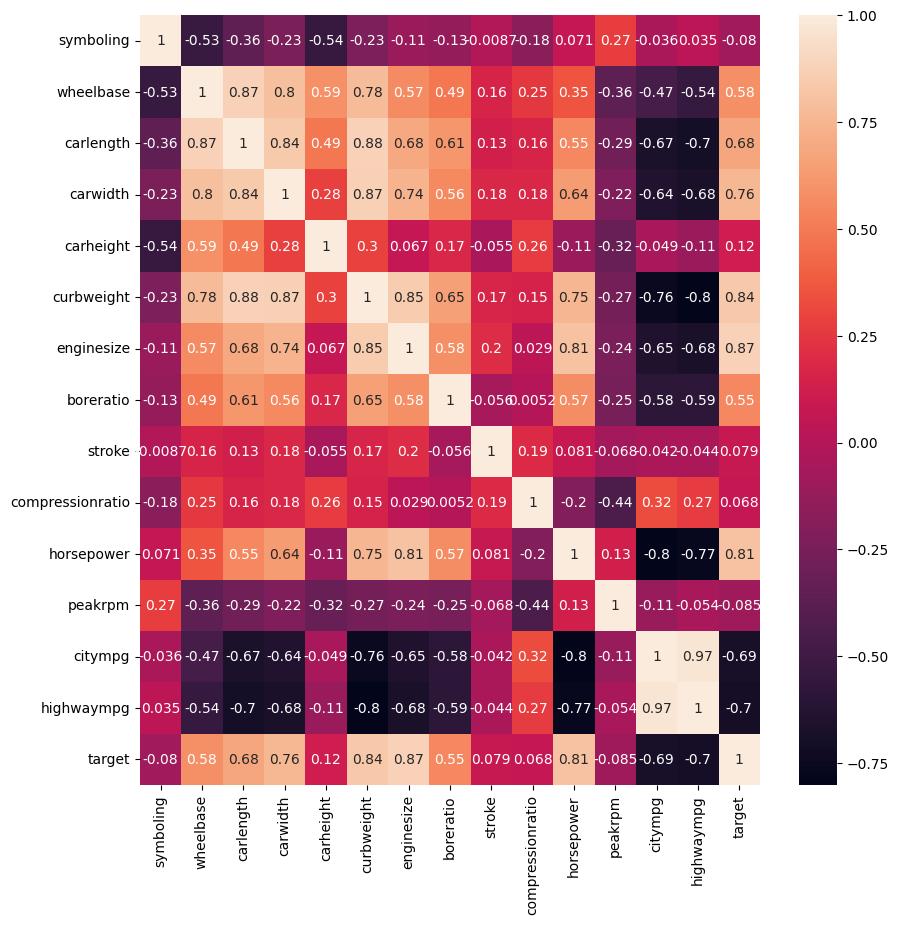

In [27]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_car.corr(numeric_only=True), annot=True);

In [30]:
features_num = ['symboling', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [33]:
# Realizado en ceda anterior:
# X_train, X_test, y_train, y_test = train_test_split(df_car.drop(columns='target'), df_car.target, test_size=0.2, random_state=42)

'''
# Separación x e y
X_train = train_set.drop(columns= ['target'])
y_train = ________[target]

X_test = _________.drop(columns = [target])
y_test = _________[_______]
'''

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [39]:
def errores(model, x, y):
    prediction = model.predict(x)
    print('MAE train', metrics.mean_absolute_error(y, prediction))
    print('RMSE train', np.sqrt(metrics.mean_squared_error(y, prediction)))
    print('R2 train', model.score(x,y))

In [41]:
errores(lin_reg, X_train, y_train)

MAE train 2186.495238619768
RMSE train 2911.593458582073
R2 train 0.8578523829898764


In [42]:
errores(lin_reg, X_test, y_test)

MAE train 2680.4299831594244
RMSE train 3789.1990073033144
R2 train 0.8181239192410048


### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [43]:
ridgeR = linear_model.Ridge(alpha=10)
ridgeR.fit(X_train, y_train)

errores(ridgeR, X_train, y_train)

MAE train 2158.243656697338
RMSE train 2977.60362006191
R2 train 0.8513339231129411


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [44]:
errores(ridgeR, X_test, y_test)

MAE train 2683.5502270180973
RMSE train 3757.5201626561297
R2 train 0.821152284676628


### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [45]:
lassoL = linear_model.Lasso(alpha=125)
lassoL.fit(X_train, y_train)

errores(lassoL, X_train, y_train)

MAE train 2160.7677449902203
RMSE train 2979.4555079978572
R2 train 0.85114894313351


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [46]:
errores(lassoL, X_test, y_test)

MAE train 2720.0084839611914
RMSE train 3767.749439656909
R2 train 0.8201771878116615


### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [50]:
elastic = linear_model.ElasticNet(alpha=0.2, l1_ratio=0.7)
elastic.fit(X_train, y_train)

errores(elastic, X_train, y_train)
print()
errores(elastic, X_test, y_test)

MAE train 2158.1465786718622
RMSE train 2976.651008914379
R2 train 0.8514290320166742

MAE train 2683.009361902569
RMSE train 3756.4490075162134
R2 train 0.8212542382711894


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

*No me queda claro qué regularizador es mejor, quizás habría que replantear las features*

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [51]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
symboling,298.268290
wheelbase,399.106955
carlength,-260.468831
carwidth,1075.310793
carheight,286.690243
curbweight,801.906271
enginesize,3666.715607
boreratio,-39.792695
stroke,-798.377036
compressionratio,1002.400432


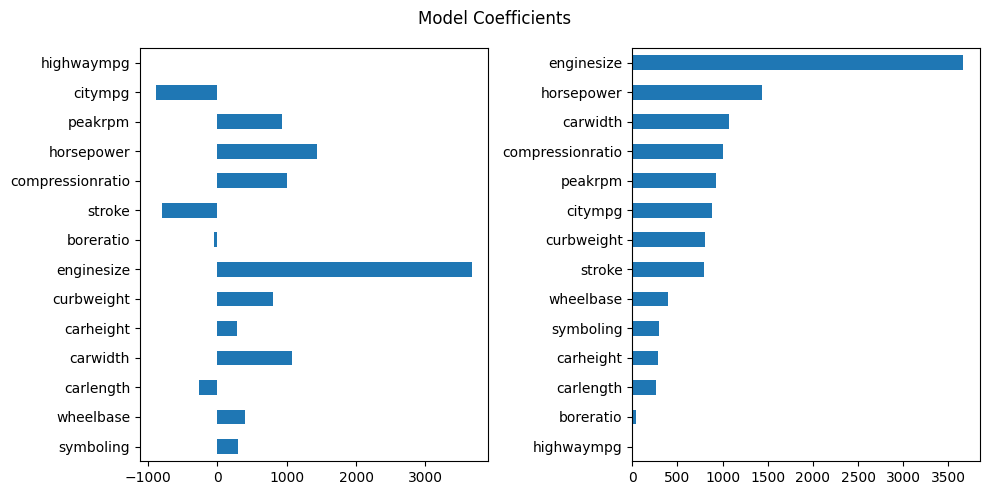

In [52]:
show_coefs(ridgeR)

,coefs
symboling,3.897387
wheelbase,0.000000
carlength,0.000000
carwidth,1185.253288
carheight,193.993785
curbweight,260.713690
enginesize,4368.898684
boreratio,0.000000
stroke,-754.360885
compressionratio,965.709886


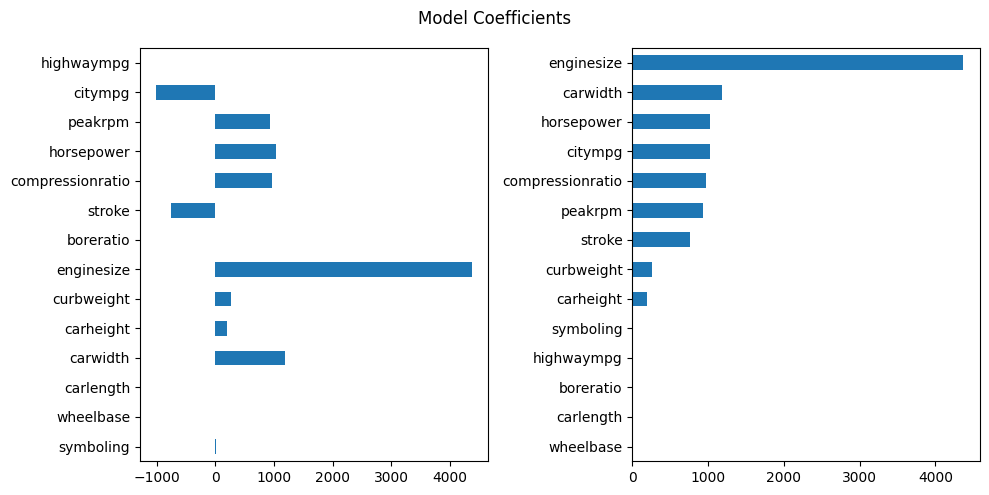

In [53]:
show_coefs(lassoL)

,coefs
symboling,298.186870
wheelbase,400.487326
carlength,-264.005043
carwidth,1075.748004
carheight,288.803417
curbweight,797.255150
enginesize,3678.052872
boreratio,-40.367076
stroke,-800.167127
compressionratio,1004.958358


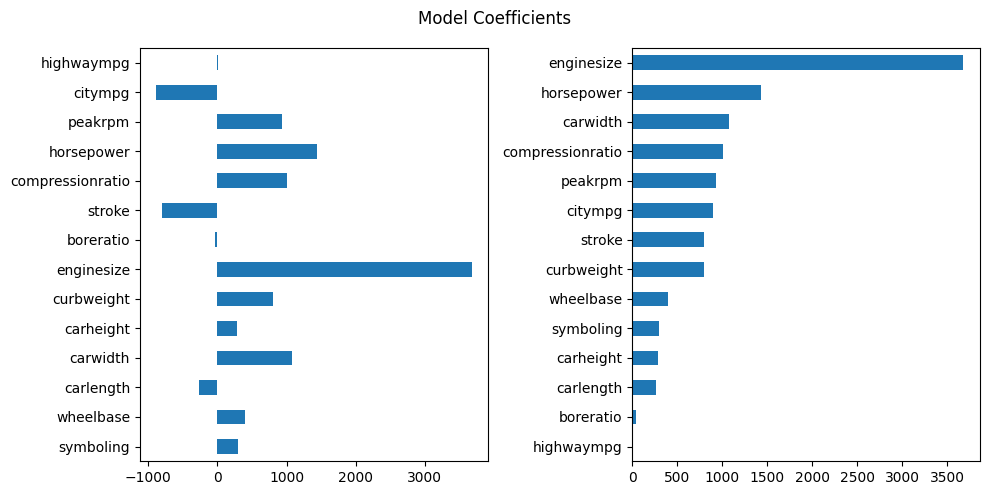

In [54]:
show_coefs(elastic)